## <u> K-means Clustering </u>

K-means clustering is a type of unsupervised learning, which is used with unlabeled dataset. The goal of this algorithm is to find K groups in the data. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

- The centroids of the K clusters, which can be used to label new data
- Labels for the training data (each data point is assigned to a single cluster)

K-means works by defining spherical clusters that are separable in a way so that the mean value converges towards the cluster center. Because of this, K-Means may underperform sometimes.

<b><u>Use Cases:</u></b>
- Document Classification
- Delivery Store Optimization
- Customer Segmentation
- Insurance Fraud Detection etc.

### <u> Algorithm </u>:

Κ-means clustering algorithm inputs are the number of clusters Κ and the data set. Algorithm starts with initial estimates for the Κ centroids, which can either be randomly generated or randomly selected from the data set. The algorithm then iterates between two steps:

<b><u>1. Data assigment step:</u></b>

Each centroid defines one of the clusters. In this step, each data point based on the squared Euclidean distance is assigned to its nearest centroid. If $c_i$ is the collection of centroids in set C, then each data point x is assigned to a cluster based on

$$\underset{c_i \in C}{\min} \; dist(c_i,x)^2$$

where dist( · ) is the standard (L2) Euclidean distance.

<b><u>2. Centroid update step:</u></b>

Centroids are recomputed by taking the mean of all data points assigned to that centroid's cluster.

The algorithm iterates between step one and two until a stopping criteria is met (no data points change clusters, the sum of the distances is minimized, or some maximum number of iterations is reached).

<b>This algorithm may converge on a local optimum. </b> Assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

<b><u>Choosing K</u></b>

If the true label is not known in advance, then K-Means clustering can be evaluated using <b> Elbow Criterion </b>, <b> Silhouette Coefficient </b> , cross-validation, information criteria, the information theoretic jump method, and the G-means algorithm. .


<b><u>Elbow Criterion Method:</u></b>

The idea behind elbow method is to run k-means clustering on a given dataset for a range of values of k (e.g k=1 to 10), for each value of k, calculate sum of squared errors (SSE).

Calculate the mean distance between data points and their cluster centroid. Increasing the number of clusters(K) will always reduce the distance to data points, thus decrease this metric, to the extreme of reaching zero when K is as same as the number of data points. So the goal is to choose a small value of k that still has a low SSE.

We run the algorithm for different values of K(say K = 10 to 1) and plot the K values against SSE(Sum of Squared Errors). And select the value of K for the elbow point.

<b><u>Silhouette Coefficient Method:</u></b>

A higher Silhouette Coefficient score relates to a model with better-defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

- The mean distance between a sample and all other points in the same class.
- The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient is for a single sample is then given as:

$$s=\frac{b-a}{max(a,b)}$$

To find the optimal value of k for KMeans, loop through 1..n for n_clusters in KMeans and calculate Silhouette Coefficient for each sample.

A higher Silhouette Coefficient indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

<u>K-Means algorithm uses Eucledean Distance, other popular distance metrics in Machine Learning are:</u>

1. <b> Cosine distance </b>: It determines the cosine of the angle between the point vectors of the two points in the n dimensional space. Closer the point vectors are by angle, the higher is the Cosine Similarity

$$\cos\theta = \frac{\overrightarrow{a} . \overrightarrow{b}}{\parallel \overrightarrow{a} \parallel \parallel \overrightarrow{b} \parallel} = \frac{\sum_{i=1}^{n} a_ib_i}{\sqrt{\sum_{i=1}^{n}a_i^2 \sqrt{\sum_{i=1}^{n}b_i^2}}}$$

where $\overrightarrow{a} . \overrightarrow{b} = \sum_{i=1}^{n}a_ib_i = a_1b_1 + a_2b_2 + ... + a_nb_n$

2. <b> Manhattan distance </b>: is the total sum of the difference between the x-coordinates  and y-coordinates.

$$ManhattanDistance = |x1 – x2| + |y1 – y2|$$

Both the RMSE and the MAE are ways to measure the distance between two vectors: the vector of predictions and the vector of target values. Various distance measures, or norms, are possible:

- Computing the root of a sum of squares (RMSE) corresponds to the Euclidian norm: it is the notion of distance you are familiar with. It is also called the ℓ2 norm(...)

- Computing the sum of absolutes (MAE) corresponds to the ℓ1 norm,(...). It is sometimes called the Manhattan norm because it measures the distance between two points in a city if you can only travel along orthogonal city blocks.

### <u> Example </u>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples

import warnings
warnings.simplefilter("ignore")

In [33]:
df = pd.read_csv('CC GENERAL.csv')
df = df.drop('CUST_ID', axis = 1) 
df.fillna(method ='ffill', inplace = True) 
df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [34]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544826


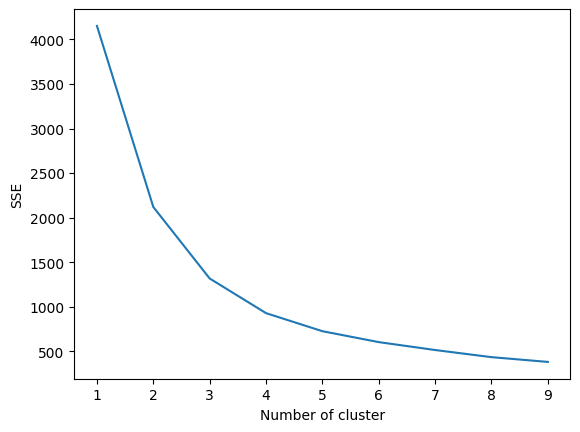

In [35]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, init="k-means++", random_state=0).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

<b>Silhouette Coefficient Method:</b>

For n_clusters = 2 The average silhouette_score is : 0.4473436176056859
For n_clusters = 3 The average silhouette_score is : 0.4578050258036111
For n_clusters = 4 The average silhouette_score is : 0.4260642646353705
For n_clusters = 5 The average silhouette_score is : 0.40055443461461127
For n_clusters = 6 The average silhouette_score is : 0.3882847105343508
For n_clusters = 7 The average silhouette_score is : 0.4071213174171429


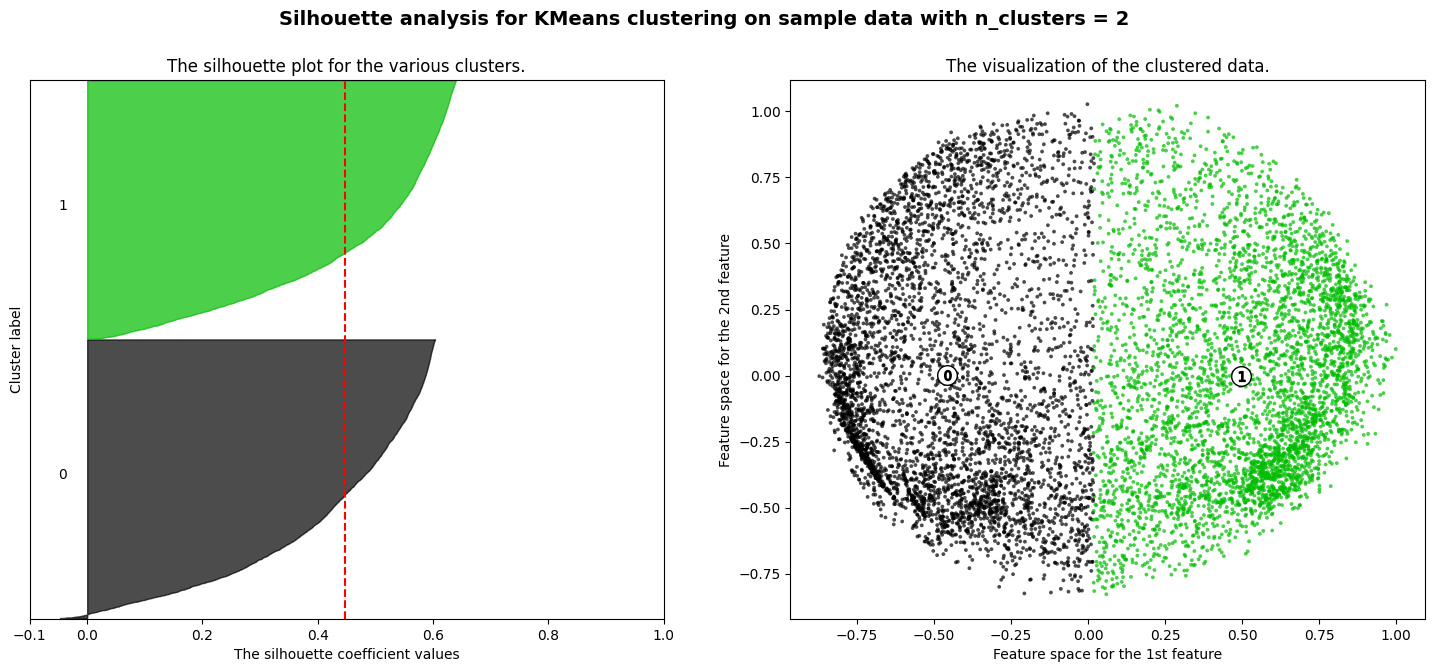

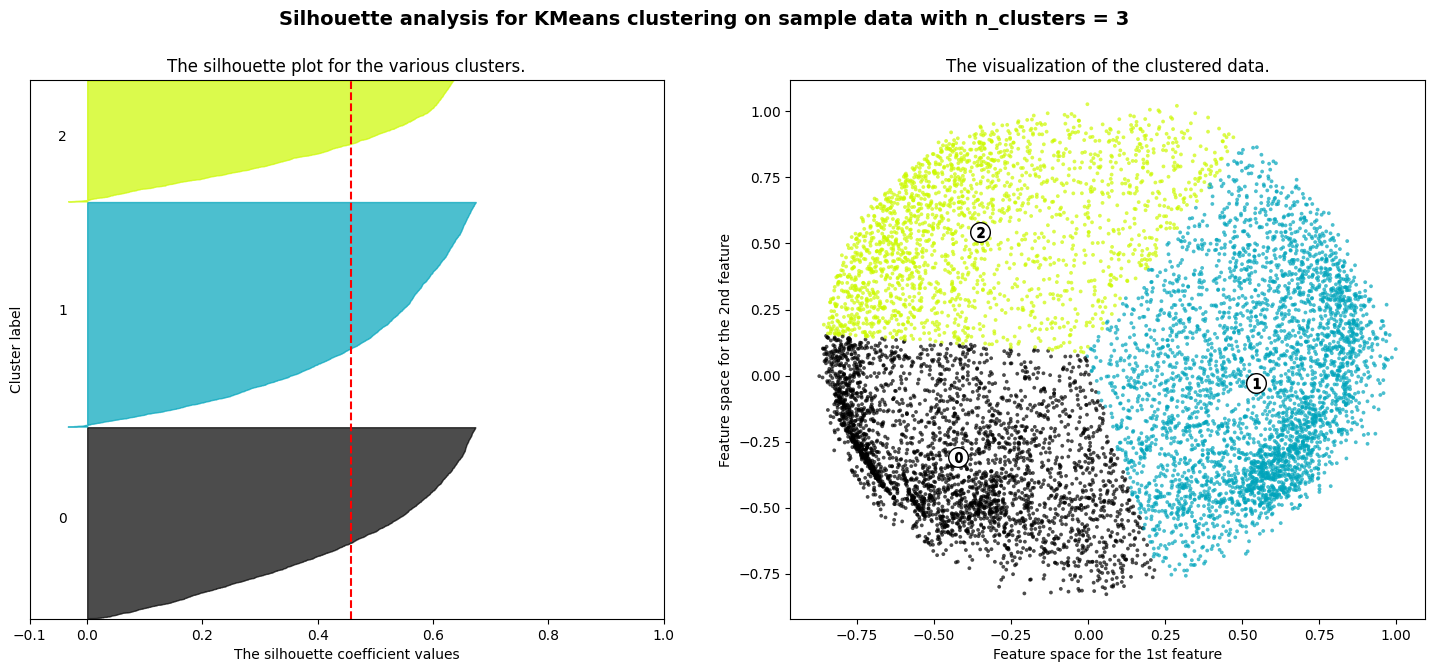

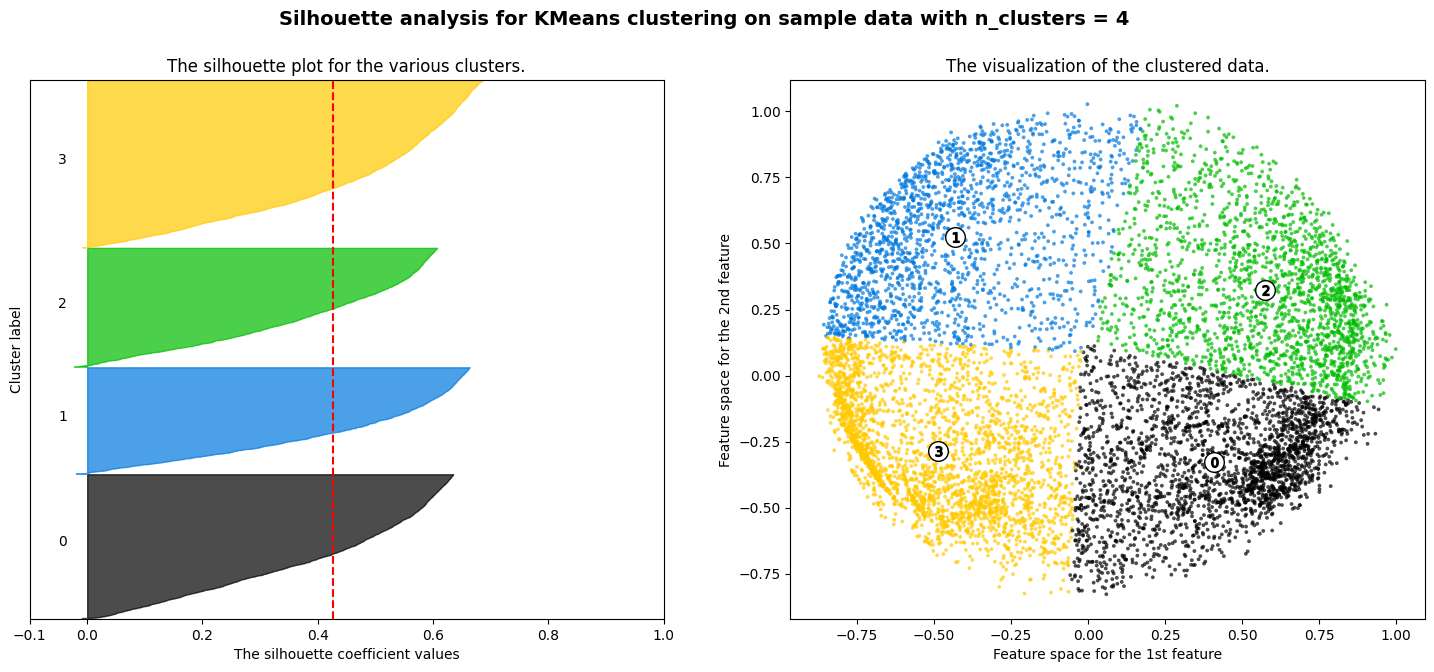

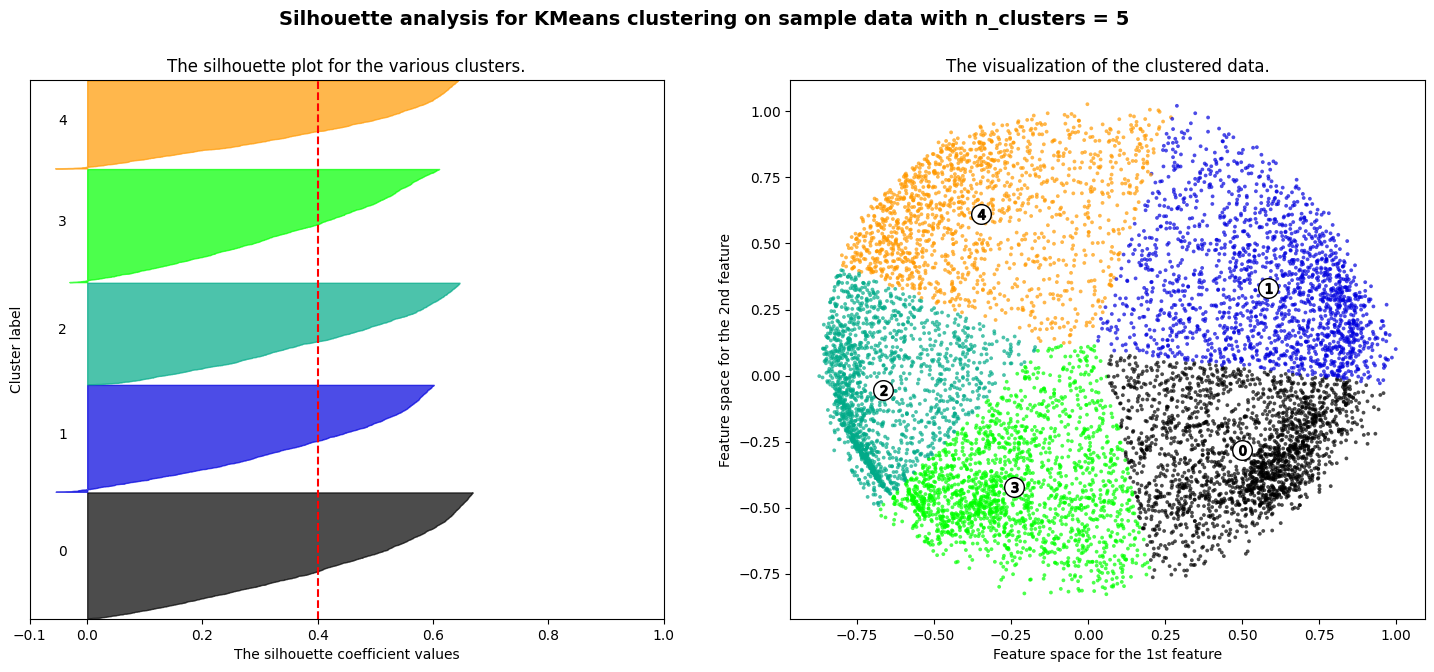

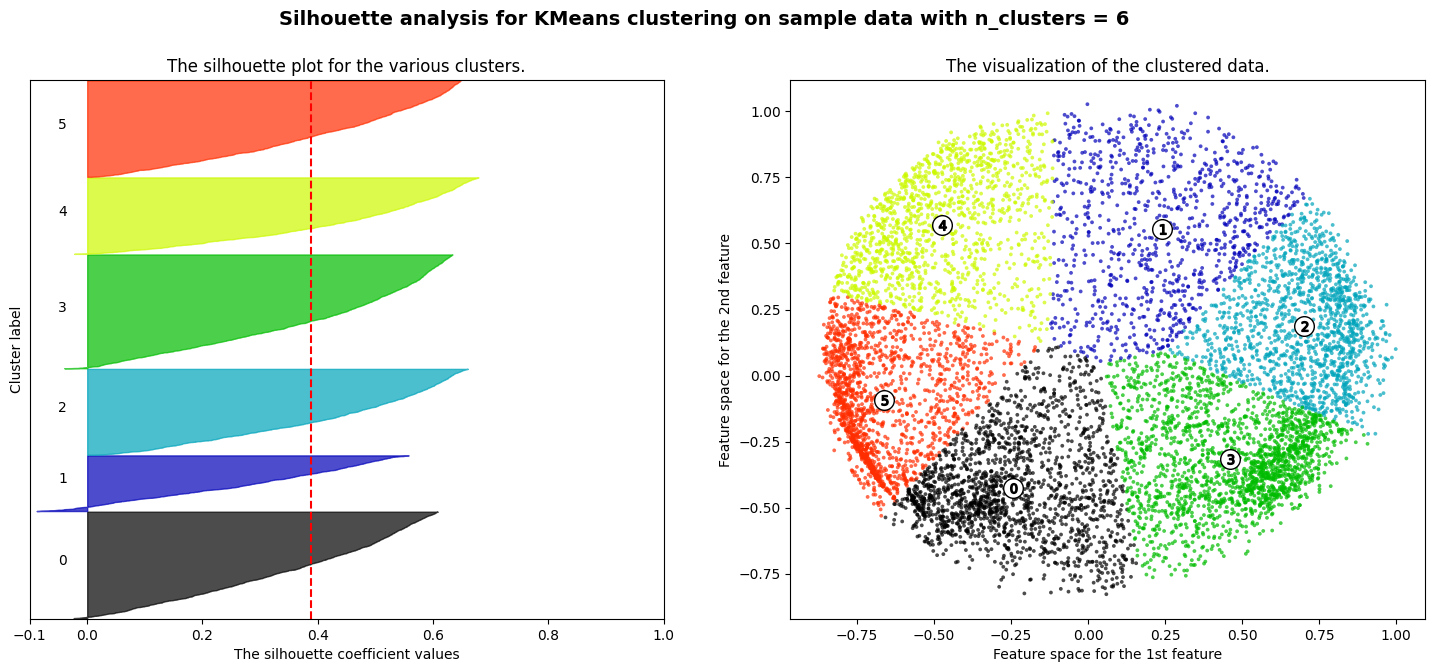

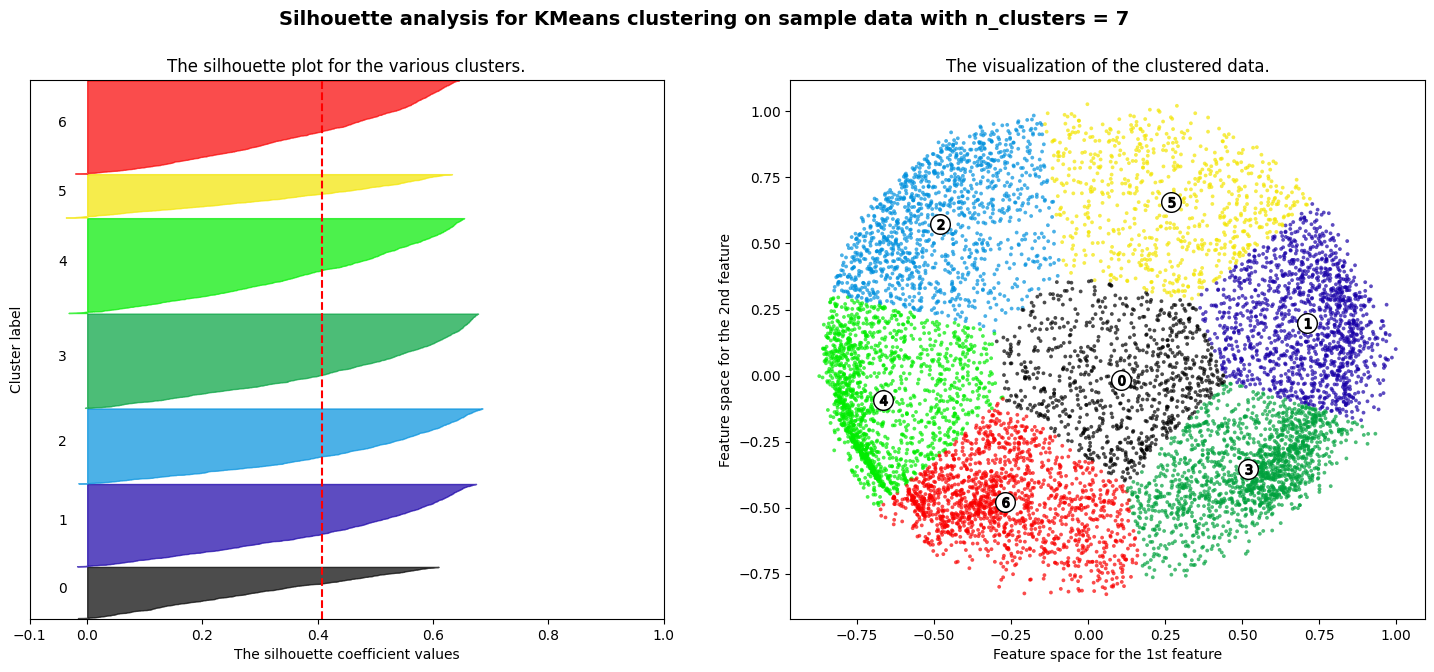

In [36]:
range_n_clusters = [2, 3, 4, 5, 6,7] 
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_principal) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_principal)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_principal, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_principal, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_principal["P1"], X_principal["P2"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()